# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [2]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
# statistical summary
description = df.describe()
print description

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


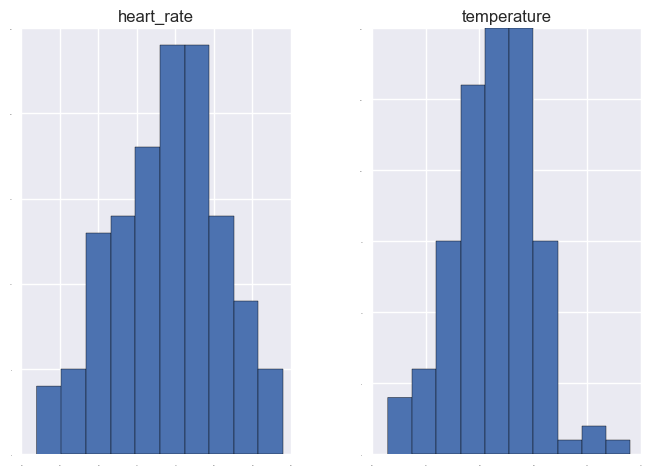

In [7]:
# visualize data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

-----
## Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

### ==> YES

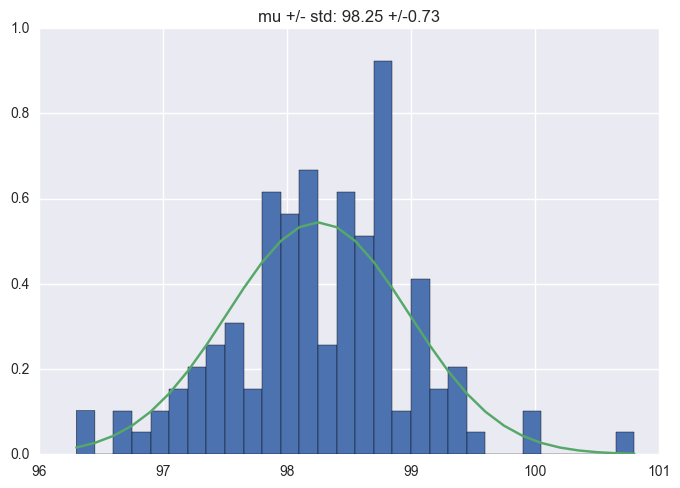

In [21]:
import matplotlib.mlab as mlab

n, bins, patches = plt.hist(df.temperature, 30, normed=1)

mu = df.temperature.mean()
sigma = df.temperature.std()
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

title = "mu +/- std: {:0.2f} +/-{:0.2f}".format(mu, sigma) 
plt.title(title)
plt.show()

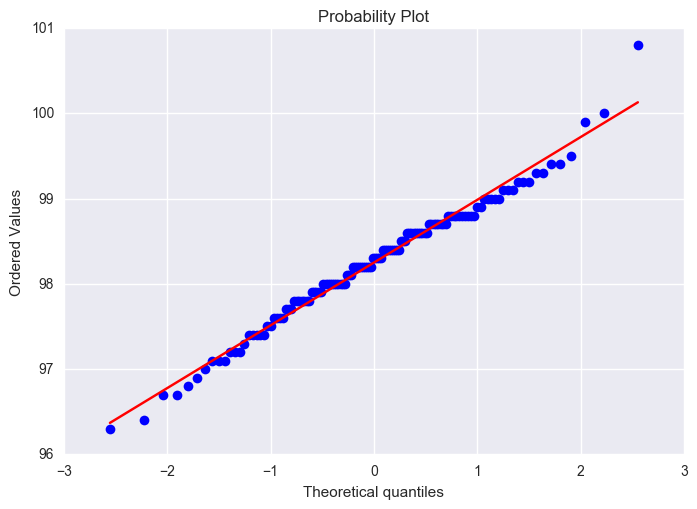

In [9]:
import numpy as np 
import pylab 
import scipy.stats as stats

#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

---
## Is the true population mean really 98.6 degrees F? 
Would you use a one-sample or two-sample test? Why? 
In this situation, is it appropriate to use the tt or zz statistic? 
Now try using the other test. How is the result be different? Why?

In [23]:
## test the population to 98.6
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

---------
## At what temperature should we consider someone's temperature to be "abnormal"? 
Start by computing the margin of error and confidence interval. 

In [29]:
# check confidence interval, we treat 1 sigma as confidence interval
conf_int = stats.norm.interval(sigma, loc=mu, scale=sigma / np.sqrt(len(df.temperature)))
print "Abnormal temperature could be defined out of the range:", conf_int

Abnormal temperature could be defined out of the range: (98.177825673280452, 98.320635865181103)


## Is there a significant difference between males and females in normal temperature? 
What test did you use and why? 

In [31]:
males = df[df.gender == "M"]
females = df[df.gender == "F"]
result = stats.ttest_ind(males['temperature'], females['temperature'], equal_var=False)
print result

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)


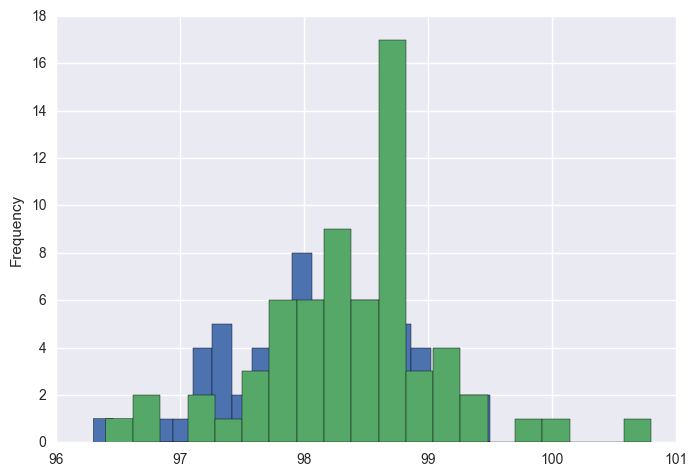

In [38]:

dmale = males['temperature']
dfemale = females['temperature']

dmale.plot(bins=20, kind='hist')
dfemale.plot(bins=20, kind='hist')

plt.show()